# DEEP LEARNING WITH PYTHON
## _FROM TABULAR TO MULTIMEDIA_

### UniFr Winter School in Data Analytics & Machine Learning
Fribourg, 14-16 February 2024

with [Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Libraries

In [3]:
!pip install -q scikeras

In [4]:
from google.colab import drive
import os as os
from requests import get

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
#from keras import layers
from tensorflow.keras import losses
#from keras import losses
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

# Data

In [4]:
def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(filename, 'wb')
    csv_file.write(res.content)
    csv_file.close()

## Wine 🍷

In [5]:
%%html
<iframe src="https://archive.ics.uci.edu/ml/datasets/wine+quality" width="1100" height="600"></iframe>

In [6]:
download_save('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
              'wine.csv')

In [7]:
df_wine = pd.read_csv('wine.csv', sep=';')
print(df_wine.shape)
df_wine.sample(10)

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
778             8.3             0.430         0.30            3.40      0.079   
1106            8.2             0.230         0.42            1.90      0.069   
132             5.6             0.500         0.09            2.30      0.049   
494             6.5             0.390         0.23            8.30      0.051   
1103            7.4             0.490         0.27            2.10      0.071   
368            10.3             0.340         0.52            2.80      0.159   
491             9.2             0.410         0.50            2.50      0.055   
1400            7.9             0.690         0.21            2.10      0.080   
64              7.2             0.725         0.05            4.65      0.086   
738             9.0             0.460         0.23            2.80      0.092   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
778                   7.0                  34.0  0.99788  3.36       0.61   
1106                  9.0                  17.0  0.99376  3.21       0.54   
132                  17.0                  99.0  0.99370  3.63       0.63   
494                  28.0                  91.0  0.99520  3.44       0.55   
1103                 14.0                  25.0  0.99388  3.35       0.63   
368                  15.0                  75.0  0.99980  3.18       0.64   
491                  12.0                  25.0  0.99520  3.34       0.79   
1400                 33.0                 141.0  0.99620  3.25       0.51   
64                    4.0                  11.0  0.99620  3.41       0.39   
738                  28.0                 104.0  0.99830  3.10       0.56   

      alcohol  quality  
778      10.5        5  
1106     12.3        6  
132      13.0        5  
494      12.1        6  
1103     12.0        6  
368       9.4        5  
491      13.3        7  
1400      9.9        5  
64       10.9        5  
738       9.2        5

a regression task

## Diabetes 💉


In [ ]:
download_save('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv',
              'pima.csv')

In [ ]:
df_pima = pd.read_csv('pima.csv',
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(10)

preg  gluc  pres  skin  insu   bmi   pedi  age  class
111     8   155    62    26   495  34.0  0.543   46      1
159    17   163    72    41   114  40.9  0.817   47      1
225     1    87    78    27    32  34.6  0.101   22      0
414     0   138    60    35   167  34.6  0.534   21      1
326     1   122    64    32   156  35.1  0.692   30      1
378     4   156    75     0     0  48.3  0.238   32      1
386     5   116    74    29     0  32.3  0.660   35      1
623     0    94    70    27   115  43.5  0.347   21      0
666     4   145    82    18     0  32.5  0.235   70      1
688     1   140    74    26   180  24.1  0.828   23      0

class is whether the person got diabetes after 5 years. This is classification.

# Regression

In [8]:
X = df_wine.copy()
y = X.pop('quality')
scaler = MinMaxScaler((-1, 1))

## Standardization
Necessary to interpret the coefficients.

In [9]:
X = df_wine.copy()
y = X.pop('quality')

scaler = MinMaxScaler((-1, 1))

X = pd.DataFrame(scaler.fit_transform(X),
                       columns=X.columns,
                       index=X.index)

In [10]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.504425         -0.205479        -1.00       -0.863014  -0.786311   
1      -0.433628          0.041096        -1.00       -0.767123  -0.712855   
2      -0.433628         -0.123288        -0.92       -0.808219  -0.732888   
3       0.168142         -0.780822         0.12       -0.863014  -0.789649   
4      -0.504425         -0.205479        -1.00       -0.863014  -0.786311   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.718310             -0.802120  0.135095  0.212598  -0.724551   
1            -0.323944             -0.568905 -0.011747 -0.275591  -0.580838   
2            -0.605634             -0.660777  0.017621 -0.181102  -0.616766   
3            -0.549296             -0.618375  0.164464 -0.338583  -0.700599   
4            -0.718310             -0.802120  0.135095  0.212598  -0.724551   

    alcohol  
0 -0.692308  
1 -0.569231  
2 -0.569231  
3 -0.569231  
4 -0.692308

## Linear Regression

Note: no train-test split, we're just modelling here and getting some descriptive statistics. Called "data leak"

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(mse)

0.41676716722140805


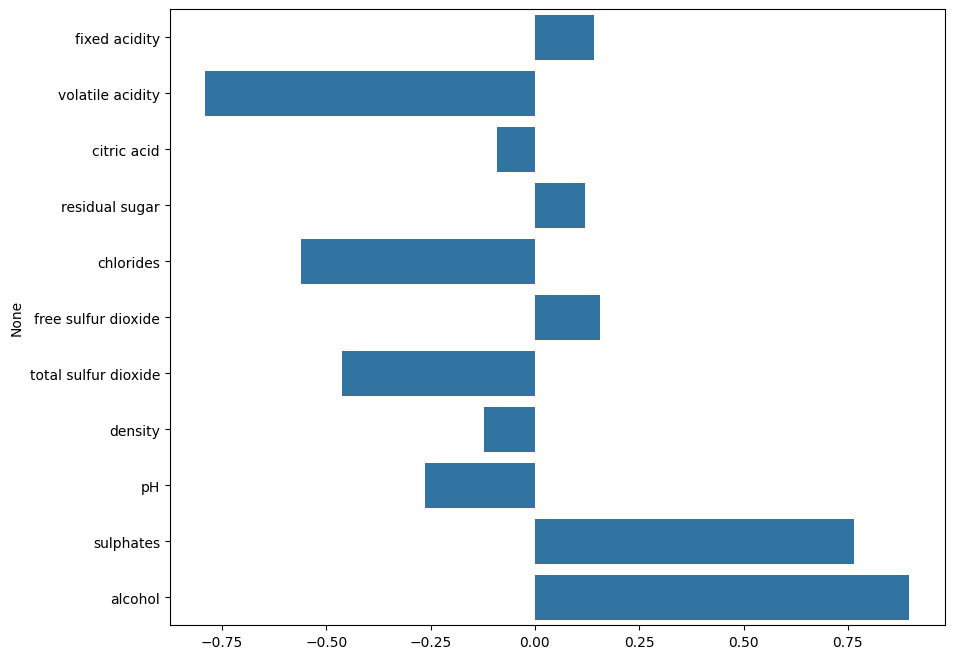

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=X.columns, x=model.coef_, orient='h')
plt.show()

## Perceptron

### Build

Let's create an architecture with 11 inputs and 1 output without an activation function. This is just a linear regression.

o
o
o
o
o
o     o
o
o
o
o
o

In [15]:
X.shape # 11 features and 1600 observations

(1599, 11)

In [16]:
dir(layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPo

In [17]:
help(layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

In [23]:
input_shape = X.shape[1] # 11

model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape], # a list, must be iterable
                 activation=None,
                 name="first_layer")
], name="one_layer_model")

In [24]:
model.summary()

Model: "one_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


"none" is the placeholder for the batch size.

### Compile

In [ ]:
model.compile(loss=losses.MeanSquaredError())

In [26]:
# even better
from tensorflow.keras.optimizers import Adam

model.compile(loss=losses.MeanSquaredError(),
              optimizer=Adam(learning_rate=1e-3))

### Train

In [29]:
%%time
history = model.fit(X, # this is the fit function of keras! No longer scikitlearn!
                    y,
                    epochs=1000,
                    verbose=0)

CPU times: user 54 s, sys: 3.06 s, total: 57.1 s
Wall time: 54 s


### Predict

In [30]:
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(mse)

50/50 [==============================] - 0s 812us/step
0.4168663842315344


In [ ]:
model.weights[0].numpy().flatten() # numpy just brings it from tensors to numpy objects and flatten just reduces the number of dimensions of the numpy object

array([-0.09287006, -0.81509966, -0.07682671, -0.02530165, -0.67440945,
        0.17827344, -0.53190935,  0.10196225, -0.4299016 ,  0.7125669 ,
        0.9774536 ], dtype=float32)

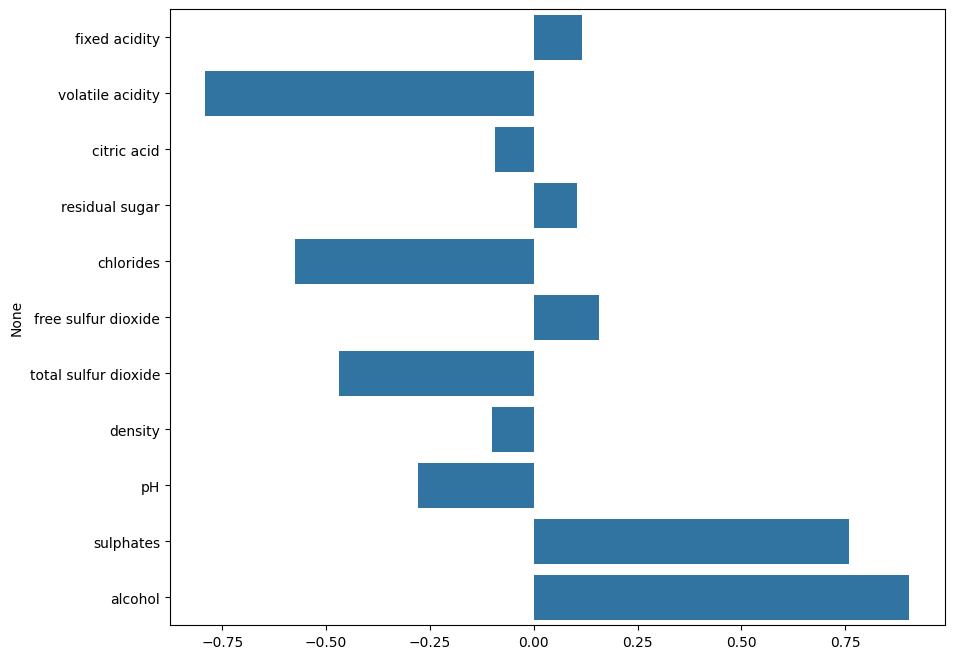

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=X.columns,
            x=model.weights[0].numpy().flatten(),
            orient='h')
plt.show()

# Pipelines 🔗


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [33]:
X_train.shape

(1279, 11)

## Linear Regression

In [34]:
model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('regressor', LinearRegression())]) # last must be the model

model.fit(X_train, y_train)

predictions = model.predict(X_test) # here the test data is also fed through the scaler
mse = mean_squared_error(y_test, predictions)
print(mse)

0.42553503336710835


In [35]:
predictions = model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
print(mse)

0.4164028192389336


## Perceptron

In [37]:
def create_perceptron(input_shape):
  # must return the compiled model
  model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape],
                 activation=None)
  ])

  model.compile(loss=losses.MeanSquaredError())

  return model

In [38]:
# Keras is good for deep learning, but if we are looking at machine learning altogether, we may want to wrap our keras deep learning into the overarching machine learning model
perceptron = KerasRegressor(model=create_perceptron, # translates the keras into a scikitlearn model
                            input_shape=X_train.shape[1],
                            epochs=1000,
                            verbose=0)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('regressor', perceptron)])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

0.42077036811962215


In [39]:
predictions = model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
print(mse)

0.4193209758344579


# Classification

In [ ]:
df_pima.sample(5)

preg  gluc  pres  skin  insu   bmi   pedi  age  class
274    13   106    70     0     0  34.2  0.251   52      0
270    10   101    86    37     0  45.6  1.136   38      1
358    12    88    74    40    54  35.3  0.378   48      0
672    10    68   106    23    49  35.5  0.285   47      0
173     1    79    60    42    48  43.5  0.678   23      0

In [ ]:
X = df_pima.copy()
y = X.pop('class')

## Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('classifier',  LogisticRegression(max_iter=1000))])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(acc)

0.7987012987012987


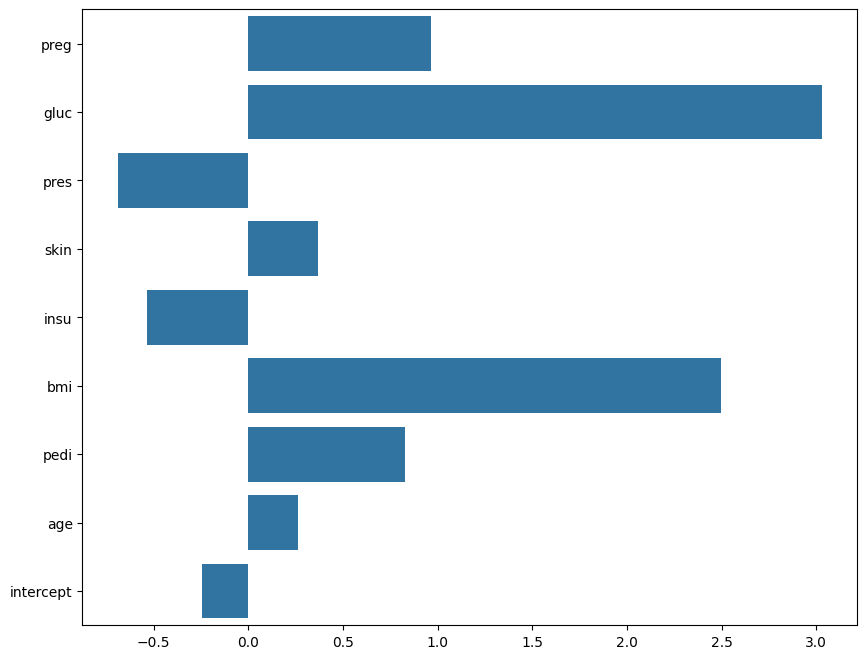

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=[*X.columns,
               'intercept'],
            x=[*model.named_steps['classifier'].coef_[0],
               model.named_steps['classifier'].intercept_[0]],
            orient='h')
plt.show()

## Perceptron

In [5]:
dir(losses)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalFocalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_focal_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'ms

In [6]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [ ]:
def create_perceptron(input_shape):
  model = keras.Sequential([
    layers.Dense(units=1,
                 input_shape=[input_shape],
                 activation='sigmoid')
  ])

  model.compile(loss=losses.MeanSquaredError())

  return model

In [ ]:
perceptron = KerasClassifier(model=create_perceptron,
                             input_shape=X_train.shape[1],
                             epochs=1000,
                             verbose=0)

model = Pipeline([('scaler', MinMaxScaler((-1, 1))),
                  ('classifier', perceptron)])

model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(acc)

0.7922077922077922


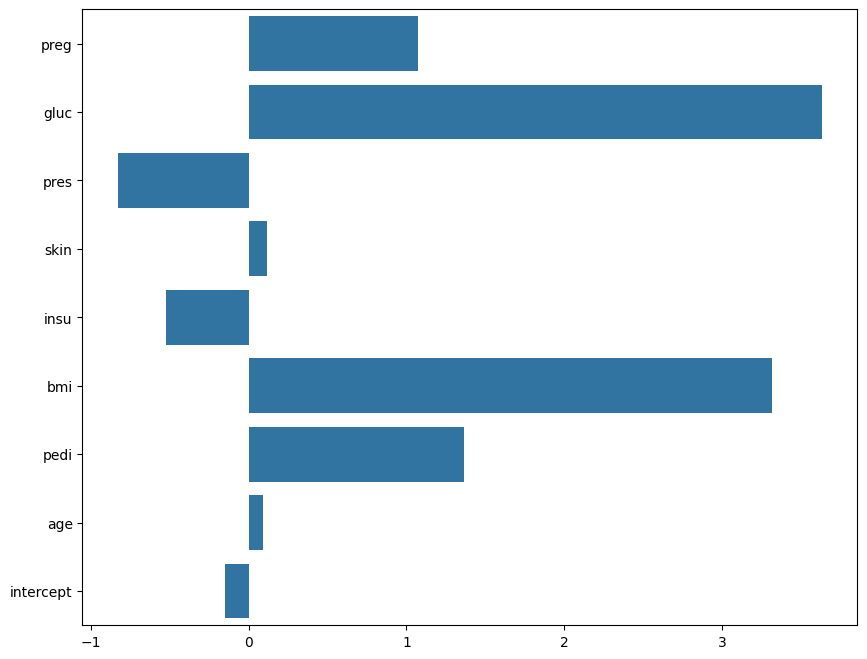

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y=[*X.columns,
               'intercept'],
            x=[*model.named_steps['classifier'].model_.weights[0].numpy().flatten(),
               *model.named_steps['classifier'].model_.weights[1].numpy().flatten()],
            orient='h')
plt.show()

### Code explanation

In [ ]:
my_list1 = [1, 2, 3]
my_list2 = [4, 5, 6]
my_list = my_list1 + my_list2
my_list

[1, 2, 3, 4, 5, 6]

In [ ]:
my_list1 = [1, 2, 3]
my_list2 = [4, 5, 6]
my_list = [*my_list1, *my_list2]
my_list

[1, 2, 3, 4, 5, 6]

In [ ]:
my_list = [1, 2, 3]
a, b, c = my_list
print(a, b, c, sep='\n')

1
2
3


# ❓ Exercise

Create the follwoing multilayer perceptron (MLP) regressor.

How many weights does it have?

_Hint_: Use model.summary()

In [ ]:
%%html
<img src="https://www.researchgate.net/profile/Martin-Cenek/publication/325067027/figure/fig5/AS:669059146342414@1536527539867/Illustration-of-the-multilayer-perceptron-artificial-neural-network-implementation-for.png"/>

In [14]:
from keras import activations

In [15]:
model = keras.Sequential([
    layers.Dense(units=4,
                 input_shape=[6], # a list, must be iterable
                 activation=activations.relu,
                 name="first_layer"),
    layers.Dense(units=3,
                 activation=activations.relu, # input is not necessary here
                 name="second_layer"),
    layers.Dense(units=1,
                 input_shape=[1],
                 name="output_layer")
], name="three_layer_model")

model.compile(loss=losses.MeanSquaredError())

In [16]:
model.summary()

Model: "three_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 4)                 28        
                                                                 
 second_layer (Dense)        (None, 3)                 15        
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 47 (188.00 Byte)
Trainable params: 47 (188.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
!pip install keras-visualizer

In [29]:
from keras_visualizer import visualizer

visualizer(model, file_format='png', view=True)

In [1]:
# automate, with a few extra layers
model = keras.Sequential([
    layers.Dense(units=4,
                 input_shape=[6], # a list, must be iterable
                 activation=activations.relu,
                 name="first_layer"),
    *[layers.Dense(units=units, activation="relu") for units in [3, 3, 5, 6]],
    layer.Dense(units=1, activation=None)
])

model.summary()

NameError: name 'keras' is not defined

In [10]:
dir(layers.Activation)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_copy_trackable_to_cpu',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_dtype',
 '_eager_losses',
 '_expects_mask_arg',
 '_expects_training_arg',
 '_export_to_saved_model_graph',
 '_flatten',
 '_flatten_layers',
 '_flatten_modules',
 '_functional_construction_call',
 '_

# UP NEXT
[Stochastic Gradient Descent](https://colab.research.google.com/drive/133b0pWYGjMKQn7wWwRnEsF4AoiO1-s9Q?usp=sharing)